### The cdf with different zero mean and unit variance are generated in exp_result.csv using matlab. 
### The first column is skewness and the second column is kurtosis.

In [1]:
import pandas as pd
from utils import *

### get exp result

In [2]:
data = pd.read_csv('exp_results.csv'
                #    ,sep='\t', lineterminator='\r'

                   )
data = data[data['---Matrix End---'] != '---Matrix End---']
data.columns = ['skewness',
                'kurtosis',
                'cdf',
                'x']
data['skewness'] = data.skewness.astype('float')
skewList = [0, 1, 2, 4,8,16,32]
kurtList = [3, 4,8,16,32,64,128,256,512,1024,2048]
# create [skewness, kurtosis] pairs
sk_kt_pair = {}
idx = 0
for sk in skewList:
    for kt in kurtList:
        sk_kt_pair[idx] = [sk, kt]
        idx = idx + 1

In [9]:
writer = pd.ExcelWriter('run_exp_results.xlsx')
for difference in [0.1, 0.3, 0.5, 0.7, 0.9]:
    sk1 = []
    kt1 = []
    sk2 = []
    kt2 = []
    AM = []
    for c1_idx in range(len(sk_kt_pair)):
        sk_kt_1 = sk_kt_pair[c1_idx] # [skew, kurt]
        for c2_idx in range(len(sk_kt_pair)):
            # print(c1_idx, c2_idx)
            sk_kt_2 = sk_kt_pair[c2_idx]
            am = run_exp(
                        sk_kt_1,
                        sk_kt_2,
                        data,
                        difference)

            sk1.append(sk_kt_1[0])
            kt1.append(sk_kt_1[1])
            sk2.append(sk_kt_2[0])
            kt2.append(sk_kt_2[1])
            AM.append(am)

    sk1 = pd.DataFrame(sk1)
    kt1 = pd.DataFrame(kt1)
    sk2 = pd.DataFrame(sk2)
    kt2 = pd.DataFrame(kt2)
    AM = pd.DataFrame(AM)

    AM_results = pd.concat([sk1, kt1, sk2, kt2, AM],
                        axis = 1)
    AM_results.columns = ['sk1',
                        'kt1',
                        'sk2',
                        'kt2',
                        'am']
    AM_results.to_excel(writer, sheet_name= str(difference))
writer.close()



# generate true or false results

In [15]:
def mark_tf(x,
            difference):
    if x >= difference:
        # or difference - x <= 0.01:
        return 1
    elif x <difference:
        return 0
    else:
        return 0.5
    
writer = pd.ExcelWriter('true_or_false.xlsx')
for difference in [0.1, 0.3, 0.5, 0.7, 0.9]:
    data = pd.read_excel('run_exp_results.xlsx',
    
                            sheet_name= str(difference))
    data = data[(data['sk1'] == 0) & (data['kt1'] == 3)]
    # data = data[data['am'] != 'NA']
    print(data['am'])
    data['tf'] = data['am'].apply(lambda x: 
                                  mark_tf(x, difference))
    data_2 = data[['sk2',
                   'kt2',
                   'tf']]
    df = pd.DataFrame(data_2)
    
    df.columns = ['sk1',
                  'kt1',
                  'percentage']
    df.to_excel(writer, sheet_name= str(difference))
writer.close()

    

0     0.096319
1     0.179452
2     0.196970
3     0.227957
4     0.217014
        ...   
72         NaN
73         NaN
74         NaN
75         NaN
76    0.768695
Name: am, Length: 77, dtype: float64
0     0.289098
1     0.371724
2     0.370993
3     0.388149
4     0.380356
        ...   
72         NaN
73         NaN
74         NaN
75         NaN
76    0.793818
Name: am, Length: 77, dtype: float64
0     0.481534
1     0.564518
2     0.563875
3     0.580781
4     0.573091
        ...   
72         NaN
73         NaN
74         NaN
75         NaN
76    0.850283
Name: am, Length: 77, dtype: float64
0     0.674142
1     0.757176
2     0.756412
3     0.773358
4     0.765595
        ...   
72         NaN
73         NaN
74         NaN
75         NaN
76    0.940727
Name: am, Length: 77, dtype: float64
0     0.866657
1     0.949821
2     0.948860
3     0.965843
4     0.958139
        ...   
72         NaN
73         NaN
74         NaN
75         NaN
76    1.056164
Name: am, Length: 77, dtype

In [4]:
def mark_tf(x,
            difference):
    if x >= difference:
        # or difference - x <= 0.01:
        return 1
    elif x <difference:
        return 0
    else:
        return 0.5
writer = pd.ExcelWriter('true_or_false_test.xlsx')
for difference in [0.1, 0.3, 0.5, 0.7, 0.9]:
    data = pd.read_excel('run_exp_results.xlsx',
    
                            sheet_name= str(difference))
    data = data[(data['sk1'] == 0) & (data['kt1'] == 3)]
    # data = data[data['am'] != 'NA']
    print(data['am'])
    data['tf'] = data['am'].apply(lambda x: 
                                  mark_tf(x, difference))
    data_2 = data[['sk2',
                   'kt2',
                   'tf']]
                   
    df = pd.DataFrame(data_2)
    
    df.columns = ['sk1',
                  'kt1',
                  'percentage']
    df.to_excel(writer, sheet_name= str(difference))
writer.close()


0     0.096319
1     0.179452
2     0.196970
3     0.227957
4     0.217014
        ...   
72         NaN
73         NaN
74         NaN
75         NaN
76    0.768695
Name: am, Length: 77, dtype: float64
0     0.289098
1     0.371724
2     0.370993
3     0.388149
4     0.380356
        ...   
72         NaN
73         NaN
74         NaN
75         NaN
76    0.793818
Name: am, Length: 77, dtype: float64
0     0.481534
1     0.564518
2     0.563875
3     0.580781
4     0.573091
        ...   
72         NaN
73         NaN
74         NaN
75         NaN
76    0.850283
Name: am, Length: 77, dtype: float64
0     0.674142
1     0.757176
2     0.756412
3     0.773358
4     0.765595
        ...   
72         NaN
73         NaN
74         NaN
75         NaN
76    0.940727
Name: am, Length: 77, dtype: float64
0     0.866657
1     0.949821
2     0.948860
3     0.965843
4     0.958139
        ...   
72         NaN
73         NaN
74         NaN
75         NaN
76    1.056164
Name: am, Length: 77, dtype

In [ ]:
for difference in [0.1, 0.3, 0.5, 0.7, 0.9]:
    results = pd.read_excel('true_or_false.xlsx',
                            sheet_name= str(difference))
    generate_binary_heatmap(results)

# Section 3.1

## 2 Normal distribution

### normal distribution with different std, bias

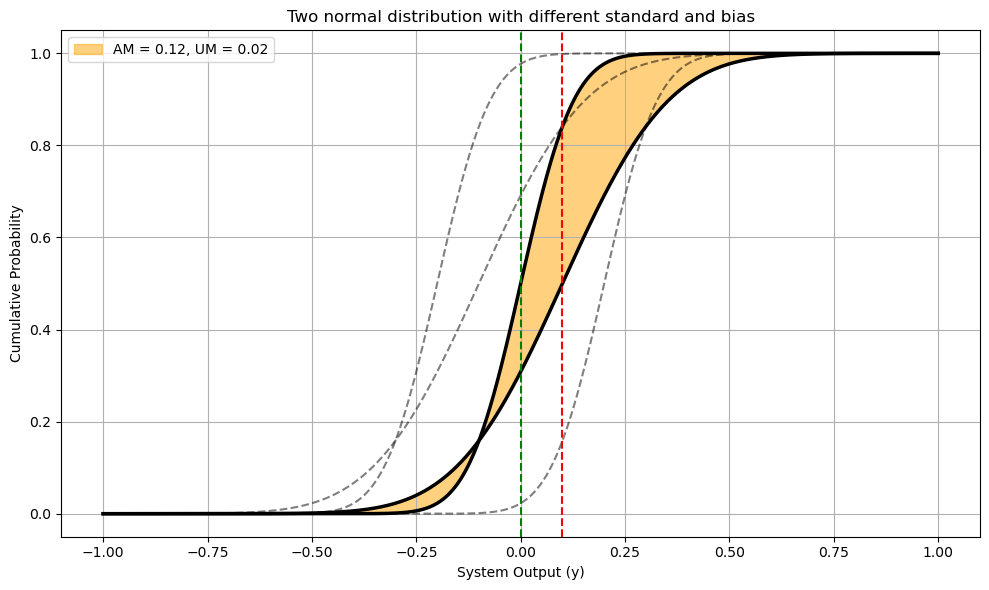

In [ ]:
### new artificial case study
# Define theoretical distributions instead of ECDF from samples
mu1, sigma1 = 0, 0.1
mu2, sigma2 = 0.1, 0.2
dist1 = stats.norm(loc=mu1, scale=sigma1)
dist2 = stats.norm(loc=mu2, scale=sigma2)
dist1_move = stats.norm(loc=-0.2, scale=sigma1)
dist2_move = stats.norm(loc=-0.1, scale = sigma2)
dist1_move2 =stats.norm(loc=0.2, scale=sigma1)
# Create x values for smooth plotting
x_vals = np.linspace(-1, 1, 1000)
cdf1 = dist1.cdf(x_vals)
cdf2 = dist2.cdf(x_vals)
cdf1_move = dist1_move.cdf(x_vals)
cdf2_move = dist2_move.cdf(x_vals)
cdf1_move2 = dist1_move2.cdf(x_vals)
cdf_mean = (cdf1 + cdf2) / 2

samples_y1 = dist1.rvs(size=10000, random_state=SEED1)
samples_y2 = dist2.rvs(size=10000, random_state=SEED2)

MU1 = samples_y1.mean()
MU2 = samples_y2.mean()
mu_sorted = np.sort([MU2, MU1])
bias = integrate.quad(bias_function, mu_sorted[0], mu_sorted[1])[0]


# Redefine area metric
area_metric_smooth = integrate.quad(lambda x: abs(dist1.cdf(x) - dist2.cdf(x)), 0.2, 1.0)[0]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, cdf1, color="black", linewidth=2.5)
plt.plot(x_vals, cdf2, color="black", linewidth=2.5)
plt.plot(x_vals, cdf1_move, linestyle="--", color = 'black',alpha=0.5)
plt.plot(x_vals, cdf2_move, linestyle="--",color = 'black',alpha=0.5)
plt.plot(x_vals, cdf1_move2, linestyle="--",color = 'black',alpha=0.5)
area_metric = integrate.quad(lambda x: abs(dist1.cdf(x) - dist2.cdf(x)), x_vals[0], x_vals[-1])[0]
# Uncertainty width: area between cdf1_move and cdf2_move over the same range
# bias = integrate.quad(bias_function, mu, x_vals[-1])[0]
plt.fill_between(x_vals, cdf1, cdf2, color='orange', alpha=0.5, label=f'AM = {area_metric:.2f}, UM = {area_metric - bias:.2f}')
plt.axvline(mu1, color="green", linestyle="--")
plt.axvline(mu2, color="red", linestyle="--")
# plt.plot(x_vals, cdf_mean, color='blue', linestyle=':', label="Mean ECDF")
plt.xlabel("System Output (y)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.title("Two normal distribution with different standard and bias")
plt.tight_layout()
plt.show()


### two normal distribution with different std, no bias (imprecise)

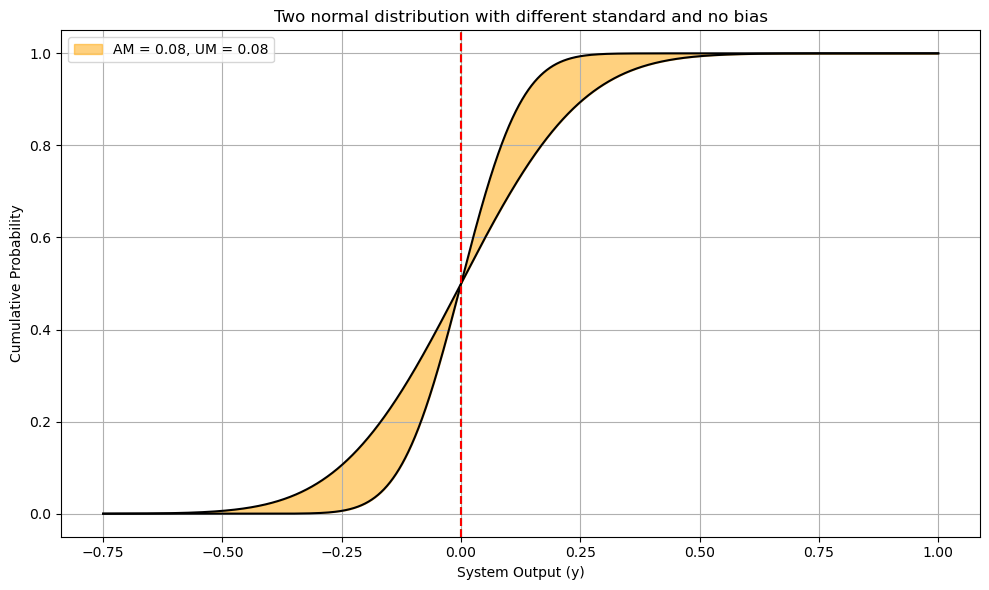

In [ ]:
mu1, sigma1 = 0, 0.1
mu2, sigma2 = 0, 0.2
dist1 = stats.norm(loc=mu1, scale=sigma1)
dist2 = stats.norm(loc=mu2, scale=sigma2)

# Create x values for smooth plotting
x_vals = np.linspace(-0.75, 1, 10000)
cdf1 = dist1.cdf(x_vals)
cdf2 = dist2.cdf(x_vals)
cdf_mean = (cdf1 + cdf2) / 2

samples_y1 = dist1.rvs(size=10000, random_state=SEED1)
samples_y2 = dist2.rvs(size=10000, random_state=SEED2)

MU1 = samples_y1.mean()
MU2 = samples_y2.mean()
mu_sorted = np.sort([MU2, MU1])
bias = integrate.quad(bias_function, mu_sorted[0], mu_sorted[1])[0]

# Redefine area metric
area_metric_smooth = integrate.quad(lambda x: abs(dist1.cdf(x) - dist2.cdf(x)), 0.2, 1.0)[0]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, cdf1, color="black")
plt.plot(x_vals, cdf2, color="black")
area_metric = integrate.quad(lambda x: abs(dist1.cdf(x) - dist2.cdf(x)), x_vals[0], x_vals[-1])[0]
# Uncertainty width: area between cdf1_move and cdf2_move over the same range
uncertainty_metric = integrate.quad(lambda x: abs(dist1_move.cdf(x) - dist2_move.cdf(x)), x_vals[0], x_vals[-1])[0]
plt.fill_between(x_vals, cdf1, cdf2, color='orange', alpha=0.5, label=f'AM = {area_metric:.2f}, UM = {area_metric - bias:.2f}')
plt.axvline(mu1, color="green", linestyle="--")
plt.axvline(mu2, color="red", linestyle="--")
# plt.plot(x_vals, cdf_mean, color='blue', linestyle=':', label="Mean ECDF")
plt.xlabel("System Output (y)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.title("Two normal distribution with different standard and no bias")
plt.tight_layout()
plt.show()

## One asymmetric distribution

### different std, no bias

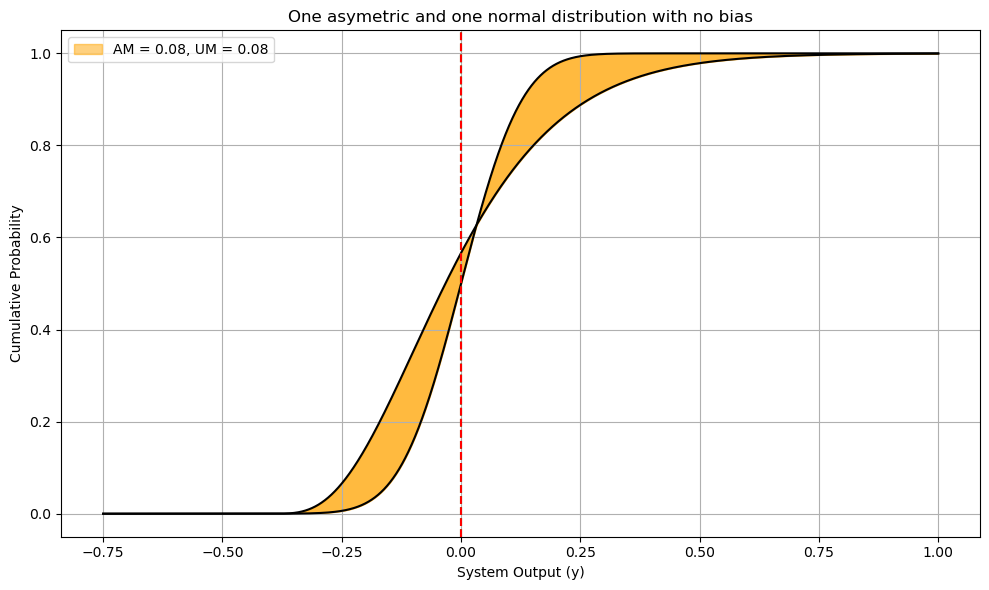

In [ ]:
# Re-import necessary modules after code execution state reset
# Re-import necessary modules after code execution state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, pearson3
from scipy import integrate

# Parameters
mu1, sigma1 = 0, 0.1
mu2, sigma2 = 0, 0.2
skewness = 1  # right-skewed

# Distributions
dist1 = norm(loc=mu1, scale=sigma1)
dist2 = pearson3(skewness, loc=mu2, scale=sigma2)

# x range for plotting
x_vals = np.linspace(-0.75, 1, 10000)
cdf1 = dist1.cdf(x_vals)
cdf2 = dist2.cdf(x_vals)

samples_y1 = dist1.rvs(size=10000, random_state=SEED1)
samples_y2 = dist2.rvs(size=10000, random_state=SEED2)

MU1 = samples_y1.mean()
MU2 = samples_y2.mean()
mu_sorted = np.sort([MU2, MU1])
bias = integrate.quad(bias_function, mu_sorted[0], mu_sorted[1])[0]


# Area metric
area_metric_smooth = integrate.quad(lambda x: abs(dist1.cdf(x) - dist2.cdf(x)), -0.75, 0.75)[0]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, cdf1, color="black")
plt.plot(x_vals, cdf2, color="black")
plt.fill_between(x_vals, cdf1, cdf2, color='orange', alpha=0.5)
plt.axvline(mu1, color="green", linestyle="--")
plt.axvline(mu2, color="red", linestyle="--")
plt.fill_between(x_vals, cdf1, cdf2, color='orange', alpha=0.5, label=f'AM = {area_metric:.2f}, UM = {area_metric - bias:.2f}')
# plt.plot(x_vals, cdf_mean, color='blue', linestyle=':', label="Mean ECDF")
plt.xlabel("System Output (y)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.title("One asymetric and one normal distribution with no bias")
plt.tight_layout()
plt.show()



###  different std, bias

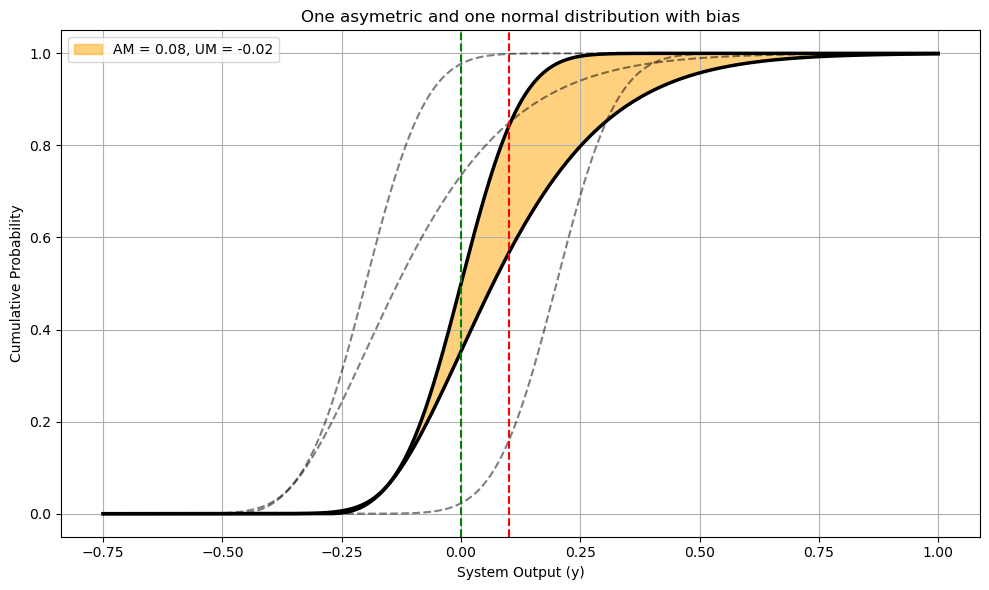

In [ ]:
# Parameters
mu1, sigma1 = 0, 0.1
mu2, sigma2 = 0.1, 0.2
skewness = 1  # right-skewed

# Distributions
dist1 = norm(loc=mu1, scale=sigma1)
dist2 = pearson3(skewness, loc=mu2, scale=sigma2)
dist1_move = norm(loc=-0.2, scale=sigma1)
dist2_move = pearson3(skewness, loc=-0.1, scale=sigma2)
dist1_move2 =norm(loc=0.2, scale=sigma1)

# x range for plotting
x_vals = np.linspace(-0.75, 1, 10000)
cdf1 = dist1.cdf(x_vals)
cdf2 = dist2.cdf(x_vals)
cdf1_move = dist1_move.cdf(x_vals)
cdf2_move = dist2_move.cdf(x_vals)
cdf1_move2 = dist1_move2.cdf(x_vals)

samples_y1 = dist1.rvs(size=10000, random_state=SEED1)
samples_y2 = dist2.rvs(size=10000, random_state=SEED2)

MU1 = samples_y1.mean()
MU2 = samples_y2.mean()
mu_sorted = np.sort([MU2, MU1])
bias = integrate.quad(bias_function, mu_sorted[0], mu_sorted[1])[0]


# Area metric
area_metric_smooth = integrate.quad(lambda x: abs(dist1.cdf(x) - dist2.cdf(x)), -0.75, 0.75)[0]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, cdf1, color="black", linewidth=2.5)
plt.plot(x_vals, cdf2, color="black", linewidth=2.5)
plt.plot(x_vals, cdf1_move, linestyle="--", color = 'black',alpha=0.5)
plt.plot(x_vals, cdf2_move, linestyle="--",color = 'black',alpha=0.5)
plt.plot(x_vals, cdf1_move2, linestyle="--",color = 'black',alpha=0.5)

plt.fill_between(x_vals, cdf1, cdf2, color='orange', alpha=0.5, label=f'AM = {area_metric:.2f}, UM = {area_metric - bias:.2f}')
plt.axvline(mu1, color="green", linestyle="--")
plt.axvline(mu2, color="red", linestyle="--")
# plt.plot(x_vals, cdf_mean, color='blue', linestyle=':', label="Mean ECDF")
plt.xlabel("System Output (y)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.title("One asymetric and one normal distribution with bias")
plt.tight_layout()
plt.show()